<a href="https://colab.research.google.com/github/ankitameher2006/Laptop_price_predictor/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("laptop_data.csv")  # 👈 no r, no \\ needed
df.head()


Saving laptop_data.csv to laptop_data.csv


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [119]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.shape

(1303, 12)

In [4]:
df.isna().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [7]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [8]:
df['Ram'] = df['Ram'].apply(lambda x:x.replace('GB',''))

In [9]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [10]:
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


In [13]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [14]:
import seaborn as sns

In [16]:
df['Price'] = df['Price'].apply(round)

<Axes: ylabel='TypeName'>

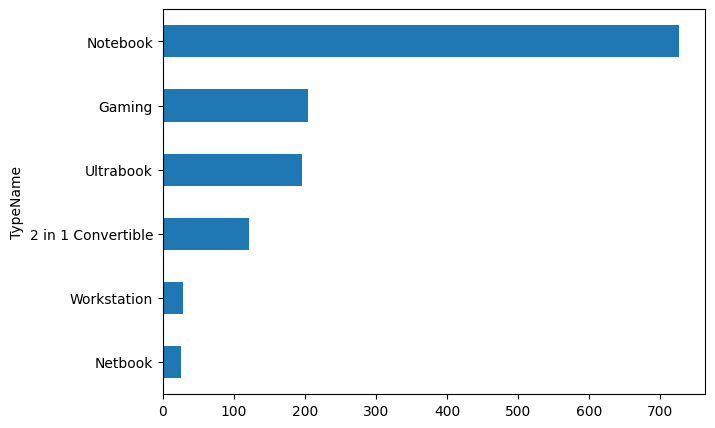

In [17]:
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(7,5))

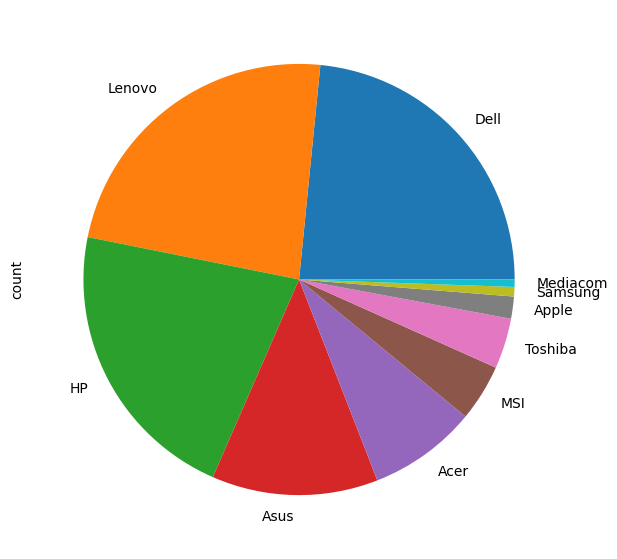

In [18]:
plt.figure(figsize=(10,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show()

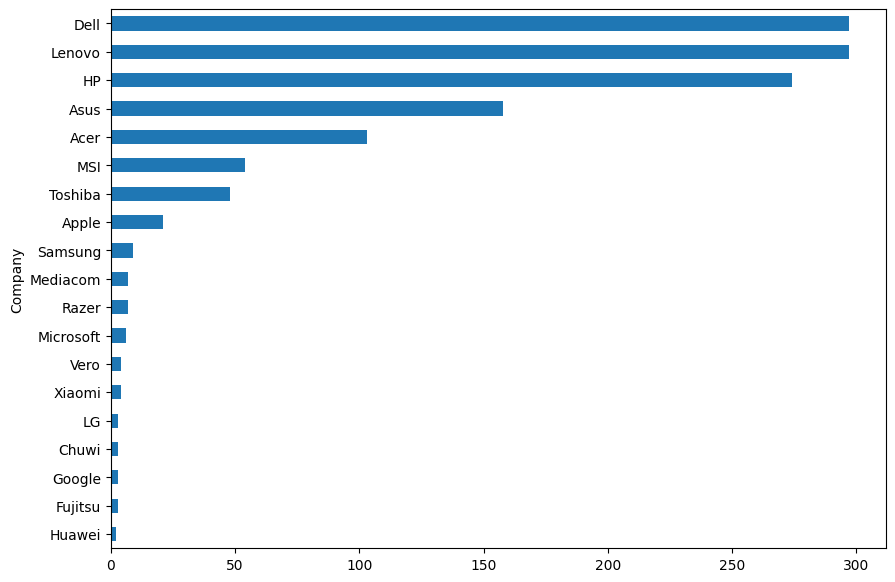

In [19]:
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

<ipython-input-20-c7c290d3bf8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


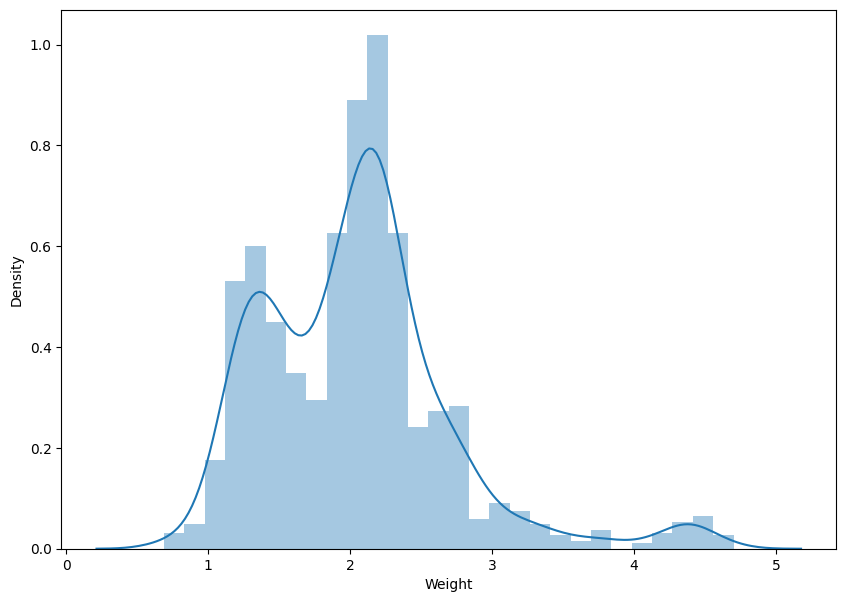

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(df['Weight'])
plt.show()

<ipython-input-21-4a1aec20b069>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins = 50)


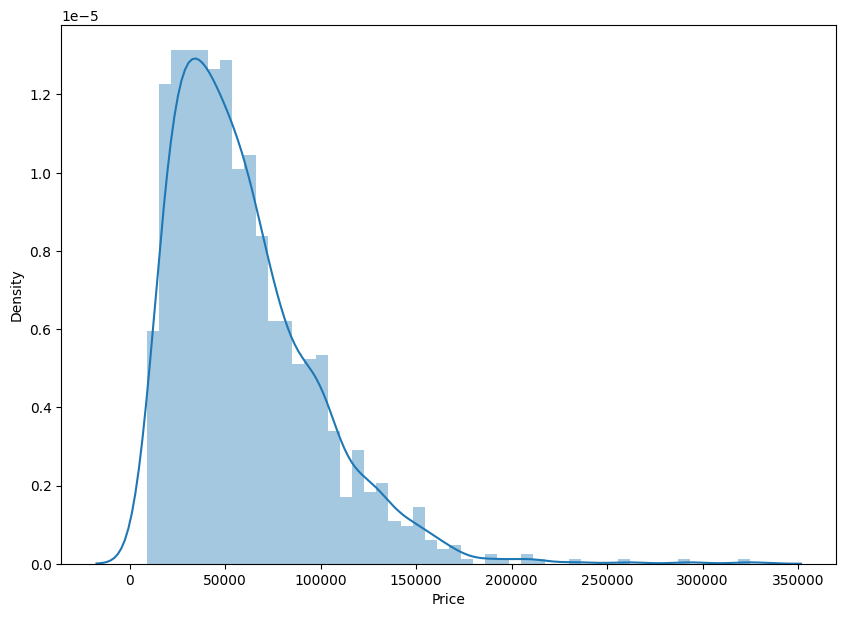

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(df['Price'],bins = 50)
plt.show()

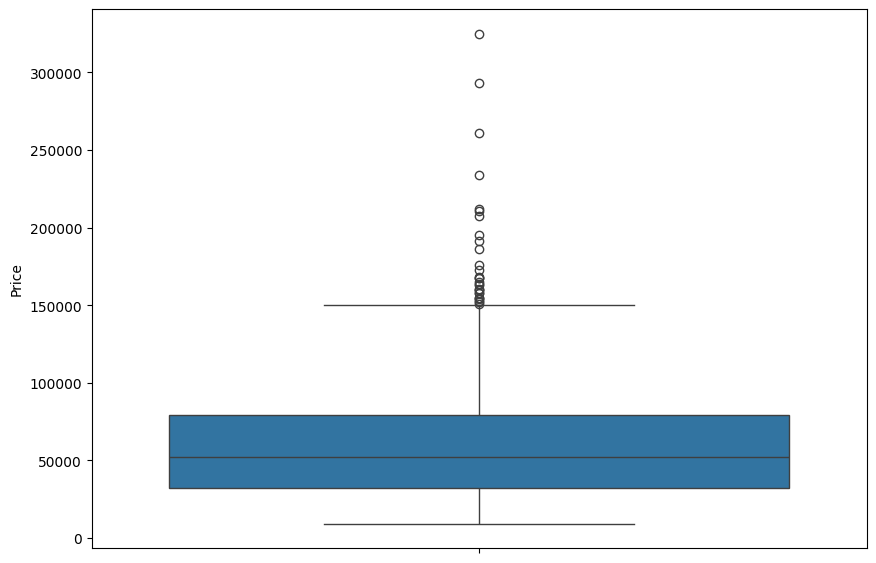

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Price'])
plt.show()

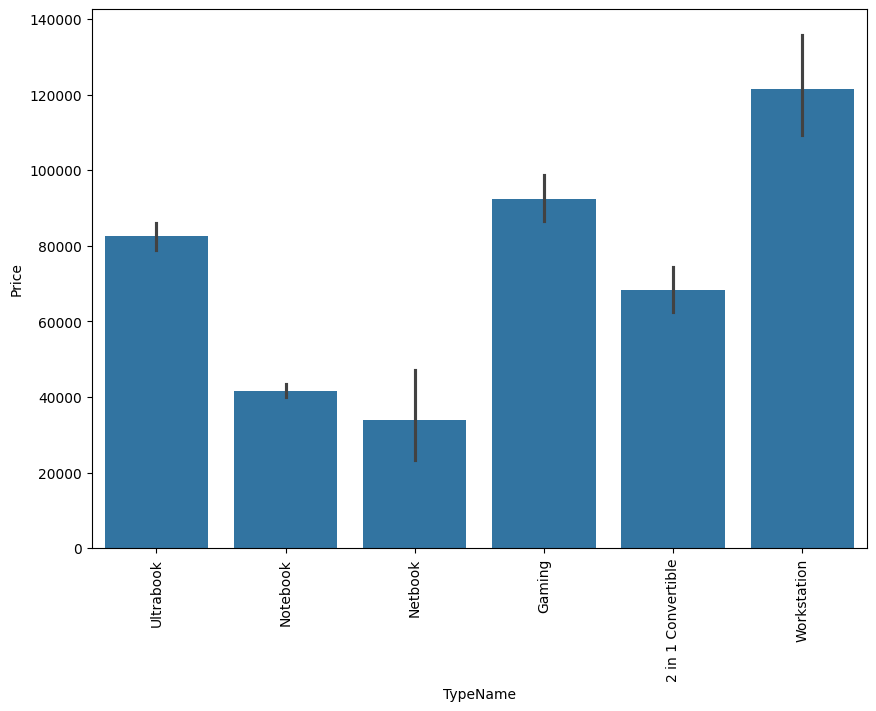

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

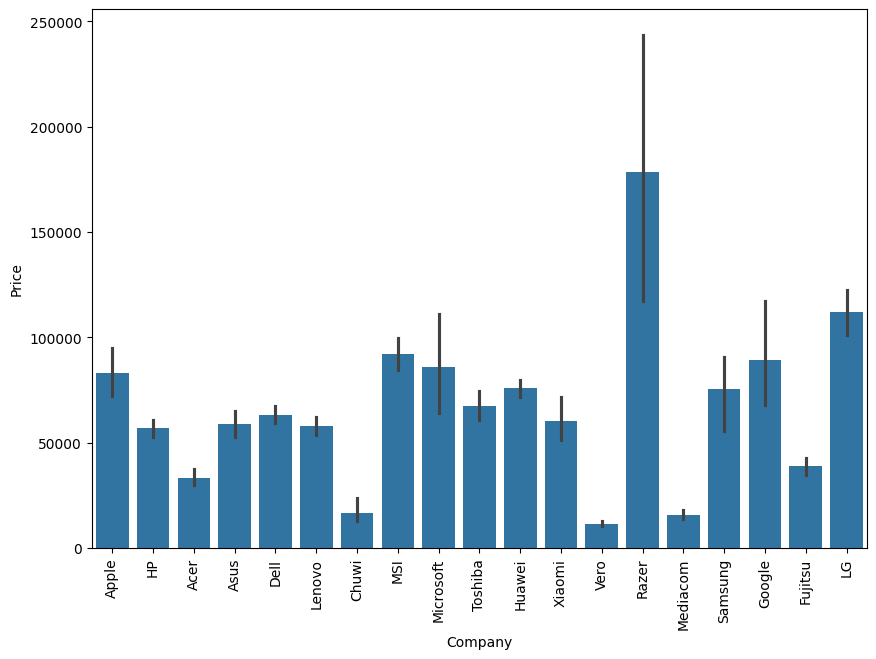

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

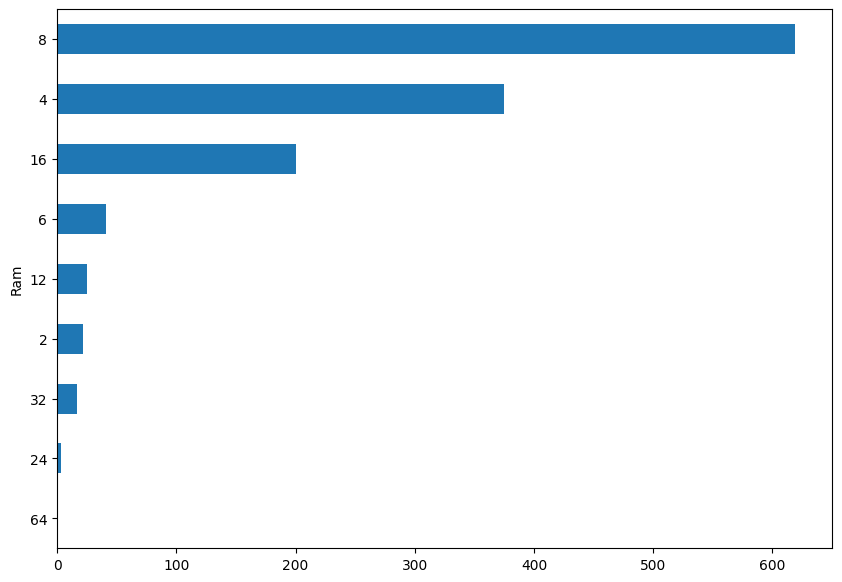

In [25]:
df['Ram'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

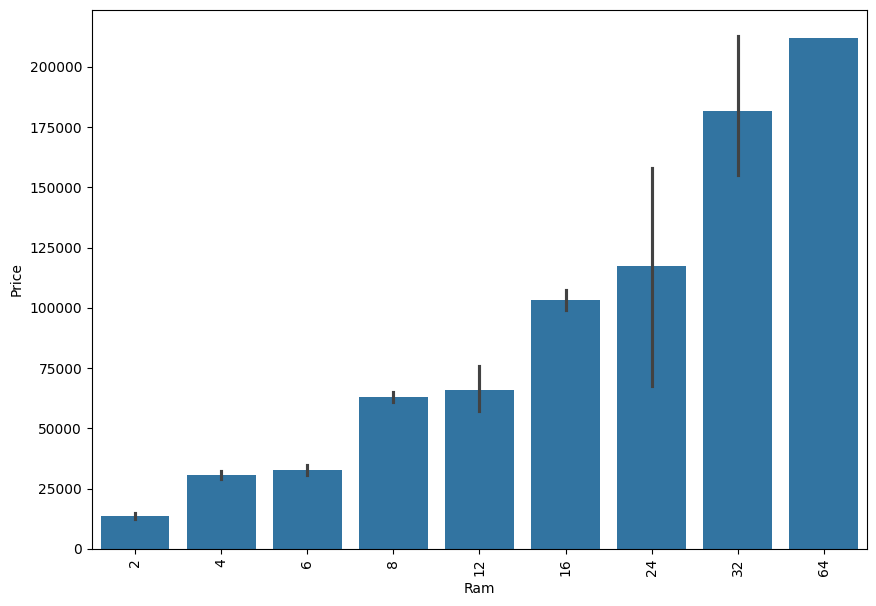

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
 df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [28]:
df.sample(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
131,131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23923,0
387,387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,72940,0


In [29]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


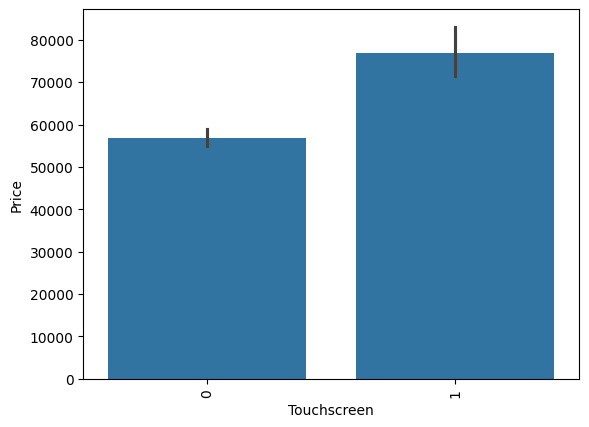

In [30]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
for i in df['ScreenResolution'].sample(5):
    print(i)

IPS Panel Full HD / Touchscreen 1920x1080
1366x768
Full HD 1920x1080
Full HD / Touchscreen 1920x1080
Full HD 1920x1080


In [32]:
df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [33]:
df.sample(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips
484,484,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.3,30103,0,0
176,176,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.1,23923,0,0
65,65,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.8,105654,0,0


In [34]:
df['ips'].value_counts()

,count
ips,
0,938
1,365


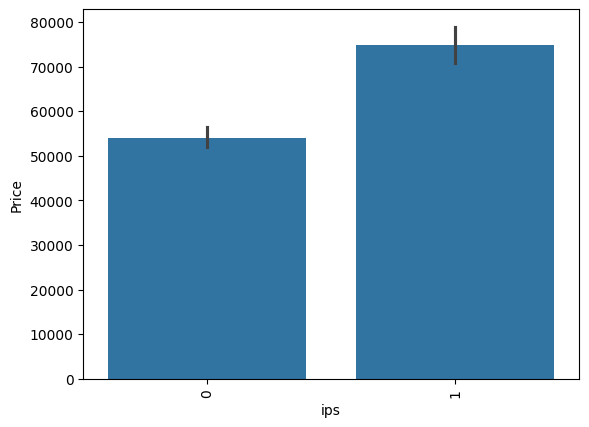

In [35]:
sns.barplot(x=df['ips'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [37]:
temp = df['ScreenResolution'].str.split('x',n=1,expand = True)

In [38]:
df['xres'] =temp[0]
df['yres'] = temp[1]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  ips               1303 non-null   int64  
 14  xres              1303 non-null   object 
 15  yres              1303 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64

In [40]:
df['xres']=df['xres'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [41]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,xres,yres
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,2560,1600


In [42]:
df['xres'] =df['xres'].astype('int')
df['yres']= df['yres'].astype('int')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  ips               1303 non-null   int64  
 14  xres              1303 non-null   int64  
 15  yres              1303 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64

In [44]:
df['ppi'] = (((df['xres']**2)+(df['yres']**2))**0.5/df['Inches']).astype('float')

In [45]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
print(numeric_df.corr()['Price'])


Unnamed: 0     0.067984
Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191227
ips            0.252208
xres           0.556530
yres           0.552809
ppi            0.473488
Name: Price, dtype: float64


In [46]:
df.drop(columns=['ScreenResolution','xres','yres','Inches'],inplace = True, axis = 'columns')

In [47]:
df.head(3)

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998


In [48]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [49]:
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [50]:
df.head(2)

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu name
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5


In [51]:
def fetch(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'AMD Processor'

In [52]:
df['Processor brand'] = df['Cpu name'].apply(fetch)
df.head(2)

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu name,Processor brand
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,Intel Core i5


In [53]:
df.sample(4)

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu name,Processor brand
1212,1212,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,103842,0,1,127.335675,Intel Core i7,Intel Core i7
247,247,Asus,Gaming,Intel Core i7 7820HK 2.9GHz,16,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159787,0,0,127.335675,Intel Core i7,Intel Core i7
1017,1017,Lenovo,Notebook,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,158135,0,1,254.671349,Intel Core i7,Intel Core i7
1243,1243,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,95851,1,0,127.335675,Intel Core i7,Intel Core i7


In [54]:
df.drop(columns = ['Cpu name','Cpu'],inplace = True)

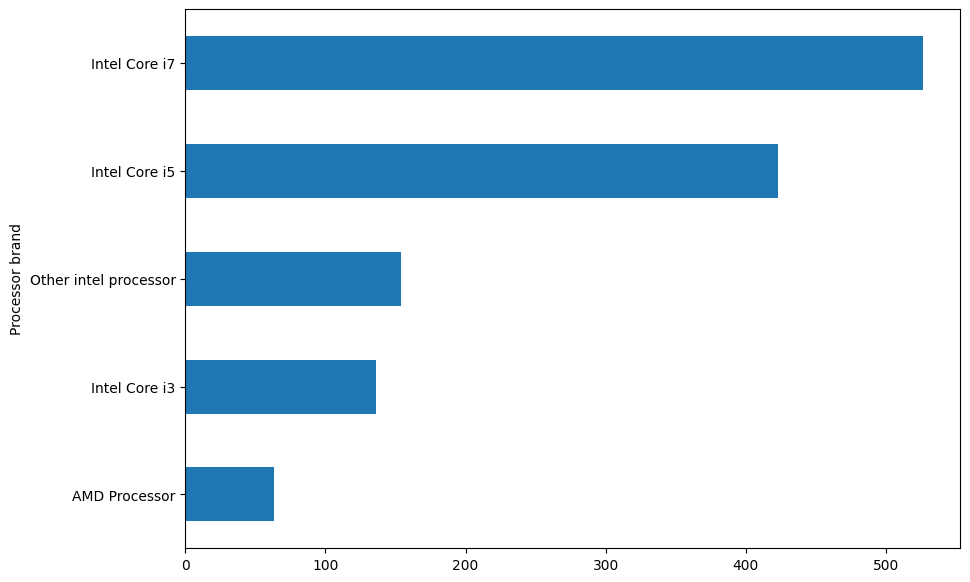

In [55]:
plt.figure(figsize=(10,7))
df['Processor brand'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

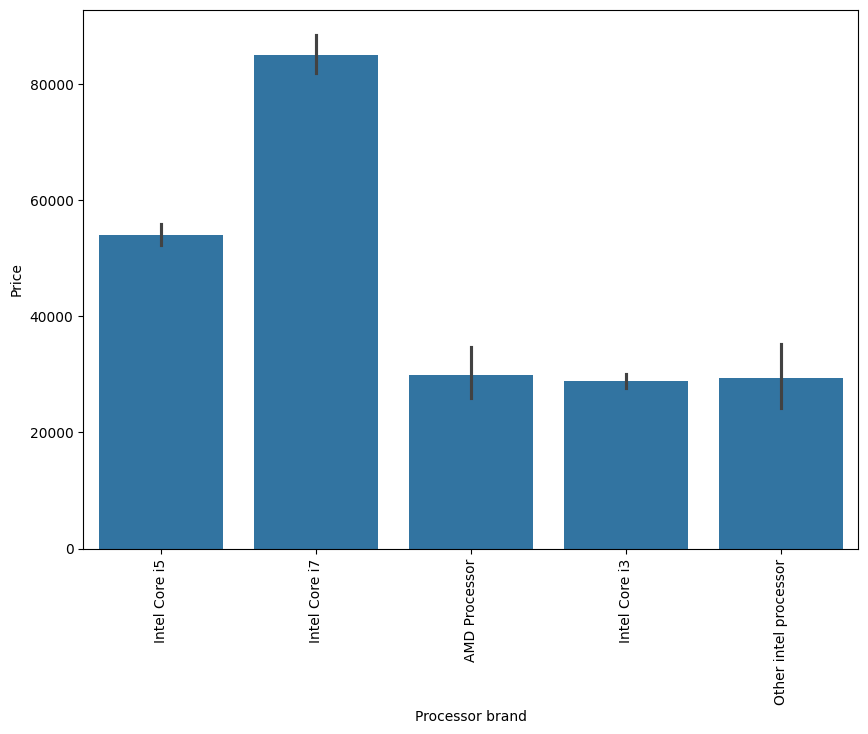

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Processor brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head(2)

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Processor brand
0,0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5


In [58]:
# Clean 'Memory' column and split into parts
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')  # 1TB = 1000GB approx

# Split into two storage components
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1]

# Create binary flags for different storage types in 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-digit characters from 'first' (e.g., '128 SSD' → '128')
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df["first"] = df["first"].replace('', '0')  # Handle any empty string cases
df["first"] = df["first"].astype(int)

# Clean and process 'second'
df["second"] = df["second"].fillna("0")  # Fill missing values with "0"
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df["second"] = df["second"].replace('', '0')  # Handle any empty string cases
df["second"] = df["second"].astype(int)

# Combine both parts to create final storage feature columns
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])


In [59]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [60]:
df.head(3)

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Processor brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,0,128
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0


In [61]:
df.drop(columns=['Memory'],inplace=True)

In [62]:
df.head(2)

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Processor brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,0,128


In [63]:
df.select_dtypes(include=['number']).corr()['Price']

,Price
Unnamed: 0,0.067984
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191227
ips,0.252208
ppi,0.473488
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989


In [64]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head(2)

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Processor brand,HDD,SSD
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0


In [65]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [66]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

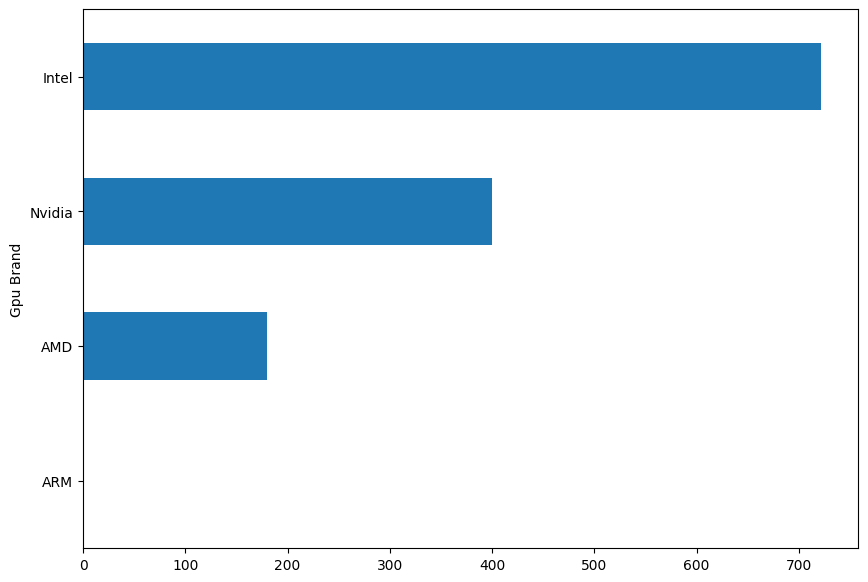

In [67]:
df['Gpu Brand'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

In [68]:
df = df[df['Gpu Brand'] != 'ARM']

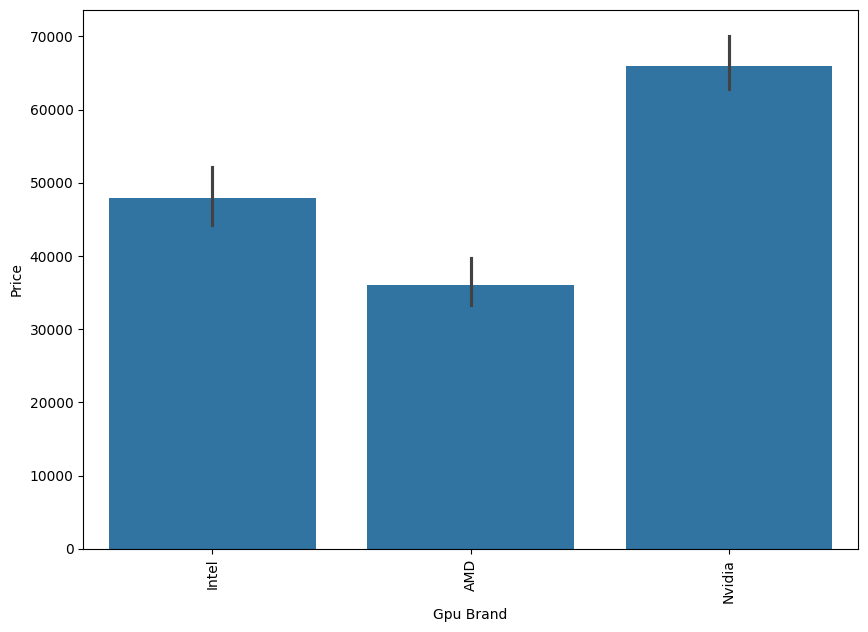

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
df.drop(columns=['Gpu'],inplace = True)

In [72]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ips,ppi,Processor brand,HDD,SSD,Gpu Brand
0,0,Apple,Ultrabook,8,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel
1,1,Apple,Ultrabook,8,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,4,Apple,Ultrabook,8,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel


In [73]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


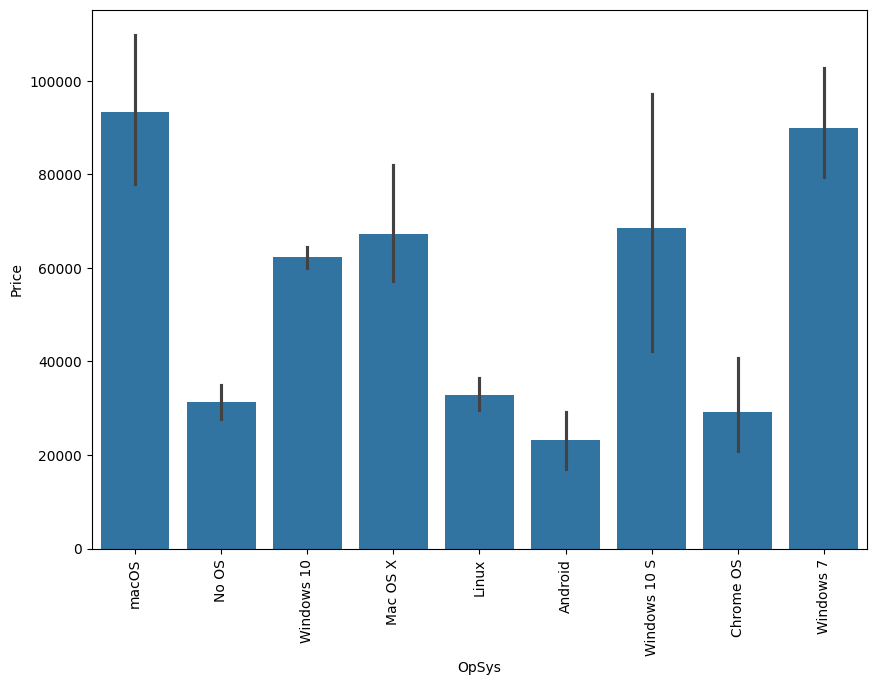

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [76]:
df['os'] = df['OpSys'].apply(cat_os)

In [77]:
df.drop(columns=['OpSys'],inplace = True)

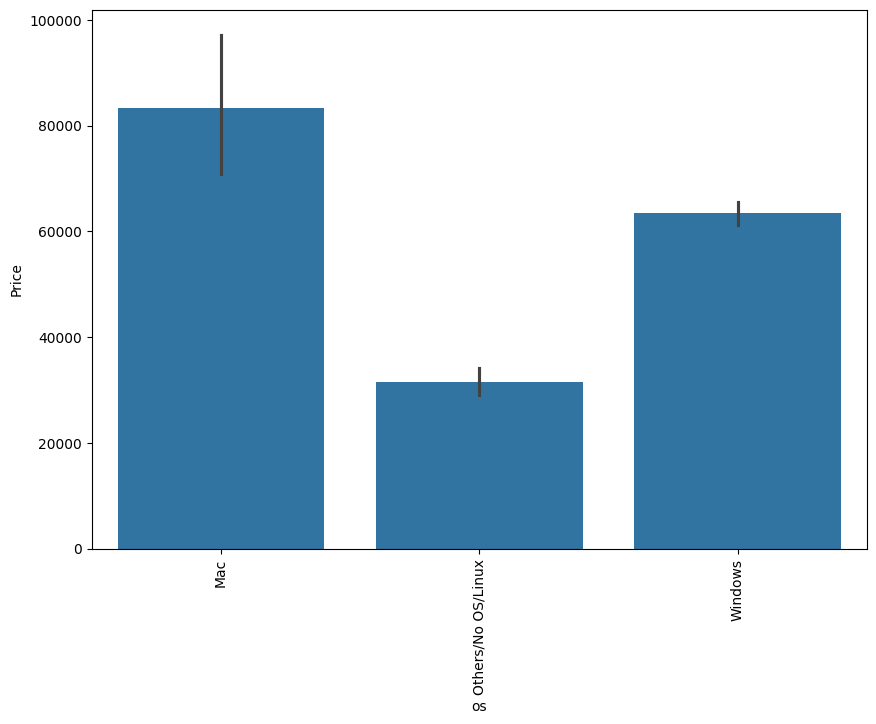

In [78]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-79-c7c290d3bf8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


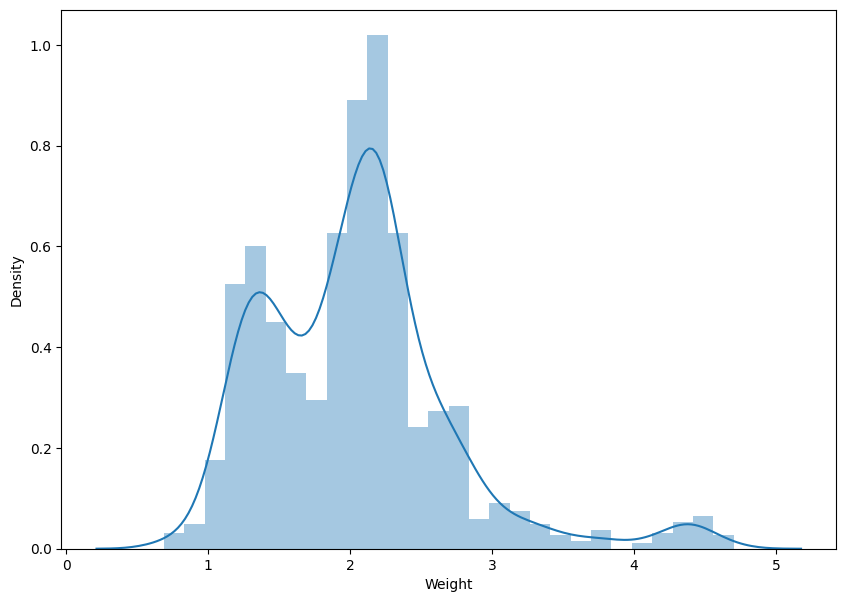

In [79]:
plt.figure(figsize=(10,7))
sns.distplot(df['Weight'])
plt.show()

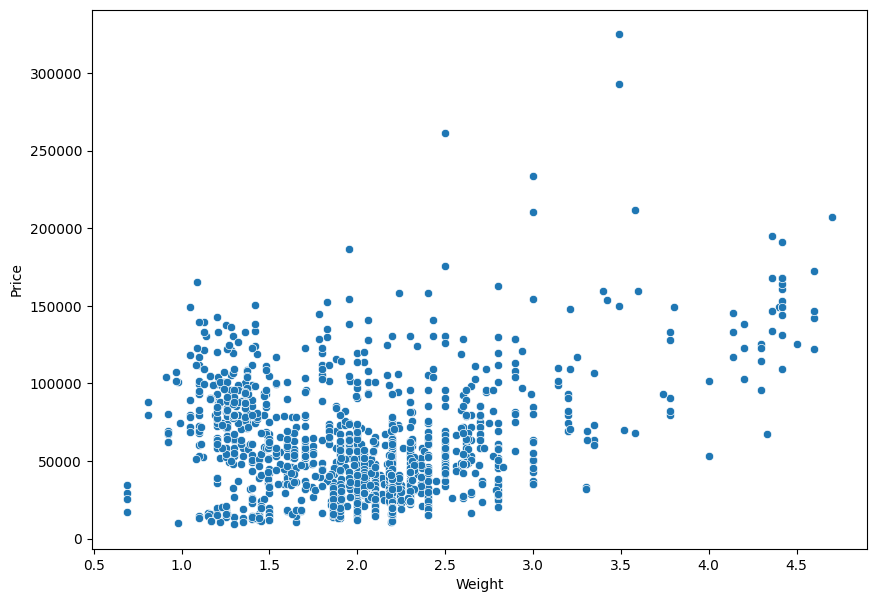

In [80]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['Weight'],y = df['Price'])
plt.show()

In [81]:
df.select_dtypes(include=['number']).corr()['Price']

,Price
Unnamed: 0,0.068783
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192918
ips,0.253320
ppi,0.475369
HDD,-0.096891
SSD,0.670660


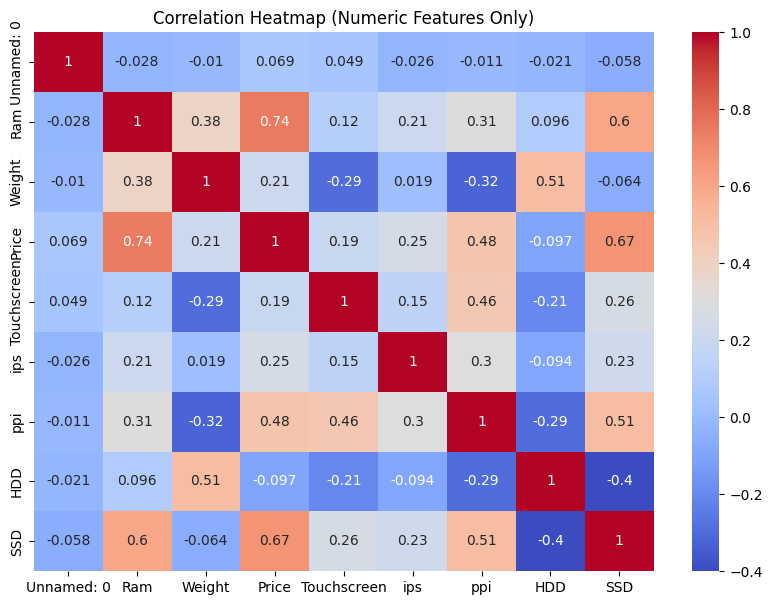

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

<ipython-input-83-e7541e8fef02>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


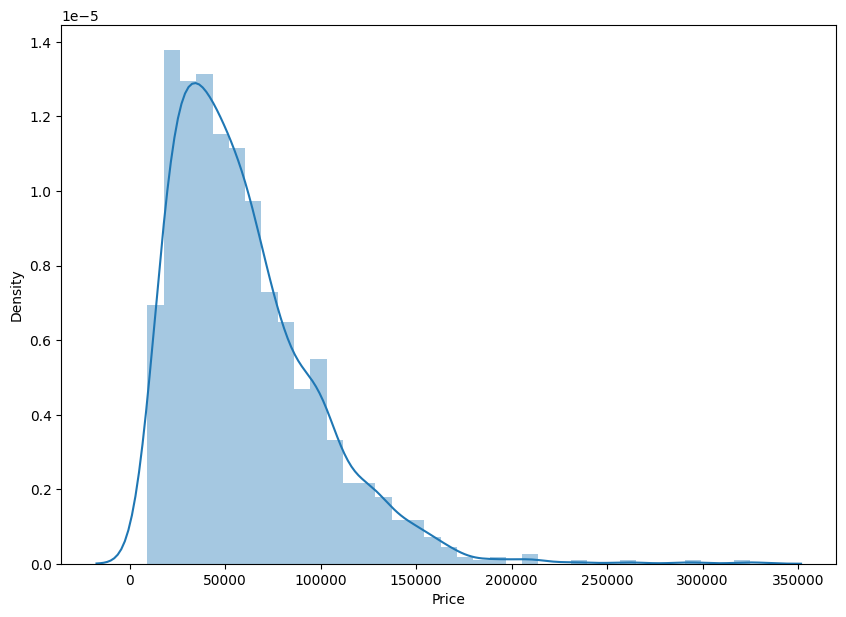

In [83]:
plt.figure(figsize=(10,7))
sns.distplot(df['Price'])
plt.show()

<ipython-input-84-ce0aba9b3507>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


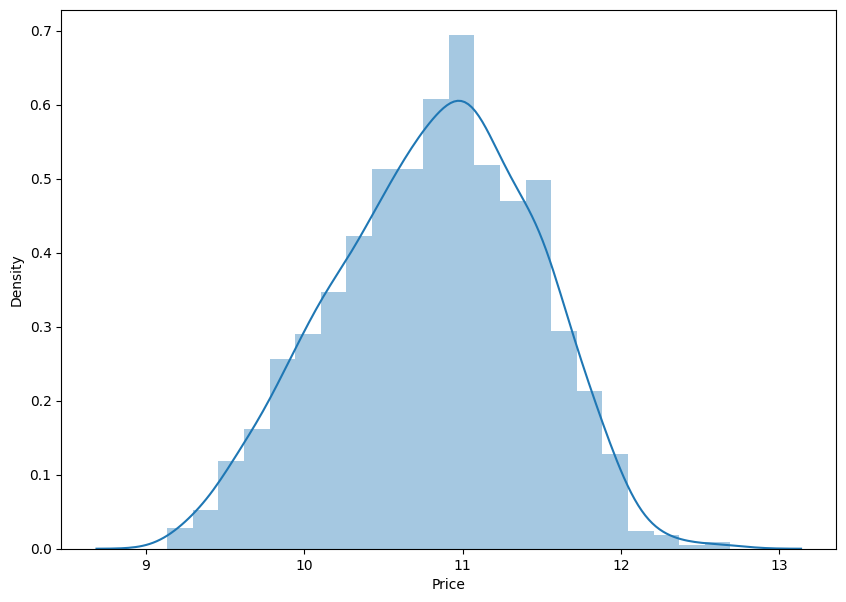

In [84]:
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Price']))
plt.show()

In [85]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [91]:
model = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('r2score:',r2_score(y_test,y_pred))
print('Mae:',mean_absolute_error(y_test,y_pred))

r2score: 0.8132406690412066
Mae: 10293.581227768467


In [94]:
x_train.head()
x_train.dtypes


,0
Unnamed: 0,int64
Company,int64
TypeName,int64
Ram,int32
Weight,float32
Touchscreen,int64
ips,int64
ppi,float64
Processor brand,int64
HDD,int64


In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=150,
                               random_state=2,
                               max_samples=0.8,
                               max_features=0.75,
                               max_depth=20)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.790082319128862
MAE: 11029.569242998561


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [97]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50,100,120,150,170],
    'max_samples': [0.1,0.3,0.4,0.5,0.7,1.0],
    'max_features' : [0.5,0.6,0.7,0.8,1],
    'max_depth' : [10,15,20,30,40,50],
    'max_samples': [0.3,0.5,0.6,0.7,0.8]
    }

search=GridSearchCV(model,parameters, cv=5, n_jobs = -1,verbose= 2)

search.fit(x_train,y_train)

print('Best Score', search.best_score_)
print('Best Parameter', search.best_params_)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Best Score 0.8063871988052493
Best Parameter {'max_depth': 20, 'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 120}


In [99]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [50,100,120,130,140,150,160,170],
    'max_samples': [0.1,0.3,0.4,0.5,0.7,1.0],
    'max_features' : [0.5,0.6,0.7,0.8,1],
    'max_depth' : [10,15,20,30,40,50],
    'max_samples': [0.3,0.5,0.6,0.7,0.8]
    }

search2 = RandomizedSearchCV(model,parameters, cv=5, n_jobs = -1,verbose= 3)

search.fit(x_train,y_train)

print('Best Score', search.best_score_)
print('Best Parameter', search.best_params_)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Best Score 0.8063871988052493
Best Parameter {'max_depth': 20, 'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 120}


In [100]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(model, x_train, y_train,cv=10,n_jobs=-1)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.78559449 0.88311609 0.84241325 0.81067967 0.86186142 0.84620718
 0.73906496 0.77115338 0.7213235  0.7779994 ]
Avg : 0.8039413344455957


In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trains = scaler.fit_transform(x_train)
x_tests = scaler.transform(x_test)

In [103]:
NN = Sequential()

NN.add(Dense(256,activation='relu'))
NN.add(Dense(1,activation='linear'))

NN.compile(loss=tensorflow.keras.losses.mae,
           optimizer='Adam',
           metrics=['mae'])

history = NN.fit(x_trains,y_train,epochs=20,validation_data = (x_tests, y_test))

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 60700.7656 - mae: 60700.7656 - val_loss: 58569.7383 - val_mae: 58569.7383
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 60861.9492 - mae: 60861.9492 - val_loss: 58567.1094 - val_mae: 58567.1094
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57740.2383 - mae: 57740.2383 - val_loss: 58563.3164 - val_mae: 58563.3164
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61255.6523 - mae: 61255.6523 - val_loss: 58557.9180 - val_mae: 58557.9180
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58658.6094 - mae: 58658.6094 - val_loss: 58550.4805 - val_mae: 58550.4805
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58533.1328 - mae: 58533.1328 - val_loss: 58540.7812 - val_mae: 58540.7812
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59688.9531 - mae: 59688.9531 - val_loss: 58528.6367 - val_mae: 58528.6367
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60048.0898 - mae

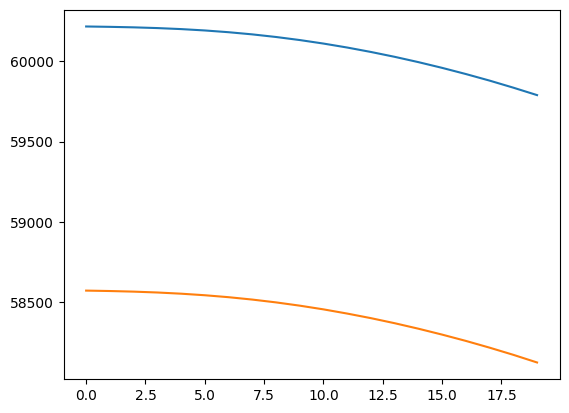

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [105]:
df.head(2)

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,Processor brand,HDD,SSD,Gpu Brand,os
0,0,Apple,Ultrabook,8,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [106]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [108]:
from google.colab import files
uploaded = files.upload()
import pickle

# Load the model
model = pickle.load(open("pipe.pkl", "rb"))

Saving pipe.pkl to pipe (1).pkl


In [116]:
pipe_feature_names = ['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'ips',
                      'Screen Size', 'ppi', 'Processor brand', 'HDD', 'SSD',
                      'Gpu Brand', 'os']

In [117]:
def price_predictor(company, typename, ram, weight, touchscreen, ips,
                    screensize, screen_res, cpu_brand, hdd, ssd, gpu_brand, os):
    import numpy as np
    import pandas as pd

    # Calculate PPI
    try:
        x_res = int(screen_res.split('x')[0].strip())
        y_res = int(screen_res.split('x')[1].strip())
        ppi = ((x_res ** 2 + y_res ** 2) ** 0.5) / screensize
    except:
        return "Screen resolution format should be like '1920x1080'"

    # Make the data in exact column order and names
    input_df = pd.DataFrame([[company, typename, ram, weight, touchscreen, ips,
                              screensize, ppi, cpu_brand, hdd, ssd,
                              gpu_brand, os]],
                            columns=['Company', 'TypeName', 'Ram', 'Weight',
                                     'Touchscreen', 'ips', 'Screen Size', 'ppi',
                                     'Processor brand', 'HDD', 'SSD',
                                     'Gpu Brand', 'os'])

    try:
        # Predict using your pipeline
        predicted_price = pipe.predict(input_df)[0]
        return f"Predicted Price: €{round(predicted_price, 2)}"
    except Exception as e:
        return f"Error during prediction: {e}"


In [120]:
price_predictor(company='Samsung',
                typename='Notebook',
                ram=8,
                weight=1.57,
                touchscreen=0,
                ips=1,
                screensize=15.6,
                screen_res='1920x1080',
                cpu_brand='Intel Core i5',
                hdd=0,
                ssd=512,
                gpu_brand='Intel',
                os='Windows')

"Error during prediction: columns are missing: {'Unnamed: 0'}"